In [1]:
## Preamble
from hw5 import RKF
import matplotlib.pyplot as plt
from numpy import array, empty, linspace, savetxt

## Function Definitions
def rossler(y, t, a, b):
    dydt = empty(3)
    dydt[0] = -y[1] - y[2]
    dydt[1] = y[0] + b*y[1]
    dydt[2] = b + y[2]*(y[0] - a)
    return dydt

## Solve the system for $(a,b)\in\lbrace(2.6, 0.2),(4.3, 0.2)\rbrace.$ Plot motion on $y_2$-$y_3$ plane.  Describe the motion.

#### Motion Description:
The particle's motion is chaotic as it does not follow a periodic path in the given Poincare section, but it follows the path of the R\"{o}ssler Attractor, a boomarang-esq shape with a sharp $y_3$ increase near $y_2 = 2$, an exponential decrease towards $y_2=0$, and constant "reset" path along the $y_3 = 0$ value.

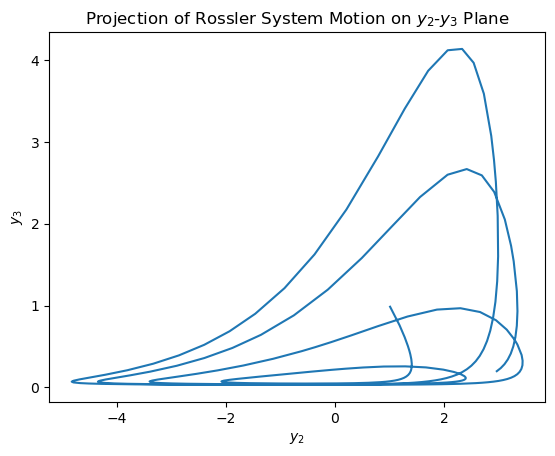

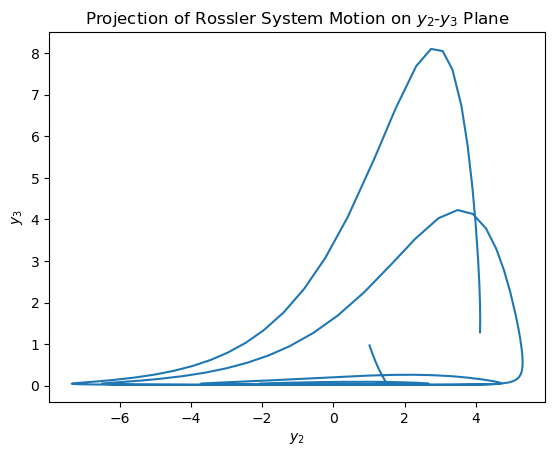

In [2]:
def motionProjection(a, b):
    # Initialize variables
    y = array([1.0, 1.0, 1.0])
    t = 0
    t_final = 25
    h = 0.01
    tol = 1e-6
    y2_values = []
    y3_values = []

    while t < t_final:
        y, t, h, accept = RKF((lambda y, t: rossler(y, t, a, b)), t, h, y, tol)  # lambda function passes rossler to RKF with positional arguements 
        y2_values.append(y[1])
        y3_values.append(y[2])

    # Plot the results
    plt.figure()
    plt.plot(y2_values, y3_values)
    plt.xlabel('$y_2$')
    plt.ylabel('$y_3$')
    plt.title('Projection of Rossler System Motion on $y_2$-$y_3$ Plane')
    plt.show()

motionProjection(2.6, 0.2)
motionProjection(4.3, 0.2)

In [3]:
def bifurcation(a0, a1, b, t0, t1, h, tol):
    bifurcation_data = []

    aVal = linspace(a0, a1)
    for a in aVal:
        y = array([1.0, 1.0, 1.0])
        t = 0

        # Transient phase
        while t < t0:
            y, t, h, accept = RKF(lambda y, t: rossler(y, t, a, b), t, h, y, tol)
        
        # Collecting bifurcation data
        prev_y = y
        while t < t1:
            y, t, h, accept = RKF(lambda y, t: rossler(y, t, a, b), t, h, y, tol)
            
            # Check for zero crossing from positive to negative
            if prev_y[0] > 0 and y[0] < 0:
                bifurcation_data.append((a, y[1]))  # Store (a, y2) pair
            prev_y = y

    return bifurcation_data

# Get the bifurcation data
a0, a1 = 2.5, 4.5
b = 0.2
t0, t1 = 75, 750
h = 0.01
tol = 1e-8

bifData = bifurcation(a0, a1, b, t0, t1, h, tol)

# Split the bifurcation data for saving
aData, y2data = zip(*bifData)

savetxt('bifurcation.dat', list(zip(aData, y2data)))

![Bifurcation](./bifurcation.png)